**Final Project Submission** 

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Bank Marketing Campaign

This project was completed as part of Flatiron School's Data Science Bootcamp (Module 3 Final Project).

## Introduction

### Problem Statement

### Business Value

### Methodology

We will adopt the OSEMN data science workflow, which involves:
1. Obtain (import the data)
2. Scrub (clean the data, deal with missing values and data types)
3. Explore (answer descriptives questions using EDA)
4. Model (build our predictive model)
5. iNterpret (comment on our model and findings)

### Libraries

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

## Obtain Data

A dataset for this project has been provided and can be found in the `Data` folder in this repository.

It was originally from <a href = 'https://archive.ics.uci.edu/ml/datasets/Bank+Marketing'> UCI Machine Learning Repository</a>. 

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

### Load Data

In [6]:
# Read data 
raw_df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

# Check first five rows
raw_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Get info
raw_df.shape

(41188, 21)

We see that we have 21 columns, with 20 feature columns and 1 target column `y`. There are 41,188 entries recorded.

### Data Dictionnary

We have been provided with the following information regarding the **features**.

`age` - (numeric)

`job` - type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

`marital` - marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

`education` - (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

`default` - has credit in default? (categorical: "no","yes","unknown")

`housing`- has housing loan? (categorical: "no","yes","unknown")

`loan`- has personal loan? (categorical: "no","yes","unknown")

`contact` - contact communication type (categorical: "cellular","telephone")

`month` - last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

`day_of_week` - last contact day of the week (categorical: "mon","tue","wed","thu","fri")

`duration` - last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

`campaign` - number of contacts performed during this campaign and for this client (numeric, includes last contact)

`pdays` - number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

`previous` - number of contacts performed before this campaign and for this client (numeric)

`poutcome` - outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

`emp.var.rate` - Employment variation is the variation of how many people are being hired or fired due to the shifts in the conditions of the economy. - quarterly indicator (numeric)

`cons.price.idx` - The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. - monthly indicator (numeric)

`cons.conf.idx` - Consumer confidence index (CCI) This consumer confidence indicator provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings. - monthly indicator (numeric)

`euribor3m` - The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. - daily indicator (numeric)

`nr.employed` - number of employees - quarterly indicator (numeric)

The **target** variable `y` is whether the client subscribed to a term deposit (binary: "yes", "no")

### Train-Test Split

Before we proceed, let us split our data into test and training sets. This test set will be use to evaluate our final model and we would like it to be completely new to us to avoid any data snooping bias.

We will ensure that the target variable `y` classes are proportional in the test set to ensure as based on our domain expertise we suspect that the classes will be unbalanced, with "yes" being a minority class.

In [18]:
# Train-test Split
train_set, test_set = train_test_split(raw_df, test_size = 0.1, stratify=raw_df['y'], random_state = 0)

print(f'Train set Shape: {train_set.shape}')
print(f'Test set Shape: {test_set.shape}')

Train set Shape: (37069, 21)
Test set Shape: (4119, 21)


## Scrub Data

Let us clean our DataFrame to ensure it is fit for exploration and modelling. We will work on a copy of the training set.

In [20]:
# Create copy to work with
df = train_set.copy()

### Check Data Types

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 27720 to 37999
Data columns (total 21 columns):
age               37069 non-null int64
job               37069 non-null object
marital           37069 non-null object
education         37069 non-null object
default           37069 non-null object
housing           37069 non-null object
loan              37069 non-null object
contact           37069 non-null object
month             37069 non-null object
day_of_week       37069 non-null object
duration          37069 non-null int64
campaign          37069 non-null int64
pdays             37069 non-null int64
previous          37069 non-null int64
poutcome          37069 non-null object
emp.var.rate      37069 non-null float64
cons.price.idx    37069 non-null float64
cons.conf.idx     37069 non-null float64
euribor3m         37069 non-null float64
nr.employed       37069 non-null float64
y                 37069 non-null object
dtypes: float64(5), int64(5), object(11)
memory

All data types appear correct.

### Missing / Placeholder Values

In [24]:
# Check for missing values
df.isna().any().any()

False

This tells us there are no explicit `NaN` missing values. However there could still be placeholder values, say if a particular number was used to denote no data for numerical attributes or a string such as 'not known' for categorical attributes.

Let's first check the numerical attributes using the describe method.

In [25]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.010440,258.504627,2.572959,962.382962,0.173460,0.082918,93.576450,-40.505287,3.621223,5167.032108
std,10.409739,259.806298,2.779804,187.134790,0.496145,1.570596,0.578924,4.619696,1.734979,72.326507
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Based on the table, there do not appear to be any placeholder values in the numerical features.

Let us now look at categorical features by inspecting value counts.

In [82]:
# Get categorical column list
cat_cols = df.select_dtypes(include = object).columns

# Print normalized value counts for categorical columns
for col in cat_cols:
    print(f"Feature: {col} \n{df[col].value_counts(normalize = True)} \n")

Feature: job 
admin.           0.254579
blue-collar      0.226739
technician       0.164936
services         0.096765
management       0.071704
retired          0.042192
entrepreneur     0.035825
self-employed    0.034503
housemaid        0.026275
unemployed       0.024846
student          0.021635
Name: job, dtype: float64 

Feature: marital 
married     0.607624
single      0.280882
divorced    0.111495
Name: marital, dtype: float64 

Feature: education 
university_degree      0.295665
high_school            0.230975
basic_9y               0.146726
professional_course    0.126683
basic_4y               0.101648
basic_6y               0.056112
unknown                0.041760
illiterate             0.000432
Name: education, dtype: float64 

Feature: default 
no     0.999919
yes    0.000081
Name: default, dtype: float64 

Feature: housing 
yes        0.523942
no         0.451833
unknown    0.024225
Name: housing, dtype: float64 

Feature: loan 
yes        0.8608
unknown    0.1392
Name: 

We see that there are `unknown` values in features `job`, `marital`, `education`, `default`, `housing` and `loan`, which we may want to address.

**job**

There is no dominating feature so our choices are to either keep `unknown` or drop the rows with missing data, which represent 0.8% of our dataset. We have selected to drop missing rows to keep the number of options manageable (as we will have to one hot encode categorical variables) and our results more interpretable.

**marital**

As the `unknown` values represent only 0.02% of our dataset, we have selected to drop them so as to not introduce potentially erraneaous data.

**education**

Similar to job, there is no dominating feature and so our choices are either to keep `unknown` or drop the rows with missing data, which represent 4% of our dataset. As this is a higher proportion, we will choose to keep `unknown` entries for now.

**default**

The `unknown` values represent 0.008% of the dataset and can be dropped to avoid introducing potentially erraneaous data.

**housing**

This binary column is split evenly as such our choices are either to keep `unknown` or drop the rows with missing data, which represent 2.4% of the dataset. We will choose to keep `unknown` entries for now.

**loan**

With 82% of the entries having value `no` and 2.4% of entries having value `unknown`, we think it best to replace the unknown values with no.

Let us apply these changes to our DataFrame.

In [42]:
# Cols in which to remove unknown
cols_unknown = ['job', 'default', 'marital']

# Replace unknwon with None and drop using dropna()
for col in cols_unknown:
    df[col] = df[col].replace('unknown', None)
    df[col] = df[col].dropna()
    
# Replace unknown values in loan with no
df['loan'] = df['loan'].replace('no')

### Clean Syntax

We see that certain column names have a `.` in them, as well as certain values in the `education` column. Let us replace these with `_`.

In [44]:
# Clean column names
df.columns = df.columns.str.replace('.', '_')

# Clean values in education
df['education'] = df['education'].str.replace('.', '_')

### Explore Duplicates

Let us check whether our data has any duplicate entries.

In [49]:
# Get duplicates
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
25217,39,admin.,married,university_degree,no,no,yes,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
23415,44,technician,married,professional_course,no,no,yes,cellular,aug,wed,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
32516,35,admin.,married,university_degree,no,yes,yes,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
28476,24,services,single,high_school,no,yes,yes,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
18464,32,technician,single,professional_course,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
236,56,blue-collar,married,basic_4y,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
12261,36,retired,married,unknown,no,no,yes,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
20534,41,technician,married,professional_course,no,yes,yes,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
16956,47,technician,divorced,high_school,no,yes,yes,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


There appear to be 9 rows with exactly the same entries. However with the absence of a unique identifier (say a customer ID) it could very well be that these do indeed represent different customers.

Due to the small number of such entries, we will keep them as such. However it is worth informing our stakeholders that it would be preferable for the data to include a unique identifier.

## Explore and Visualise Data

### Target Variable

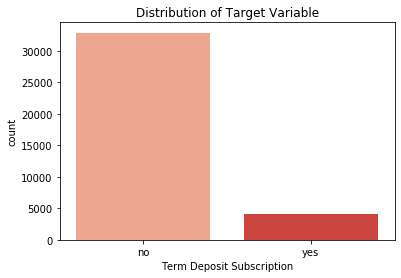

In [93]:
# Plot distribution of y
sns.countplot(df['y'], palette ='Reds')
plt.xlabel('Term Deposit Subscription')
plt.title('Distribution of Target Variable')
plt.show()

### Feature Variables

Let us begin by visualising numerical attributes via histograms.

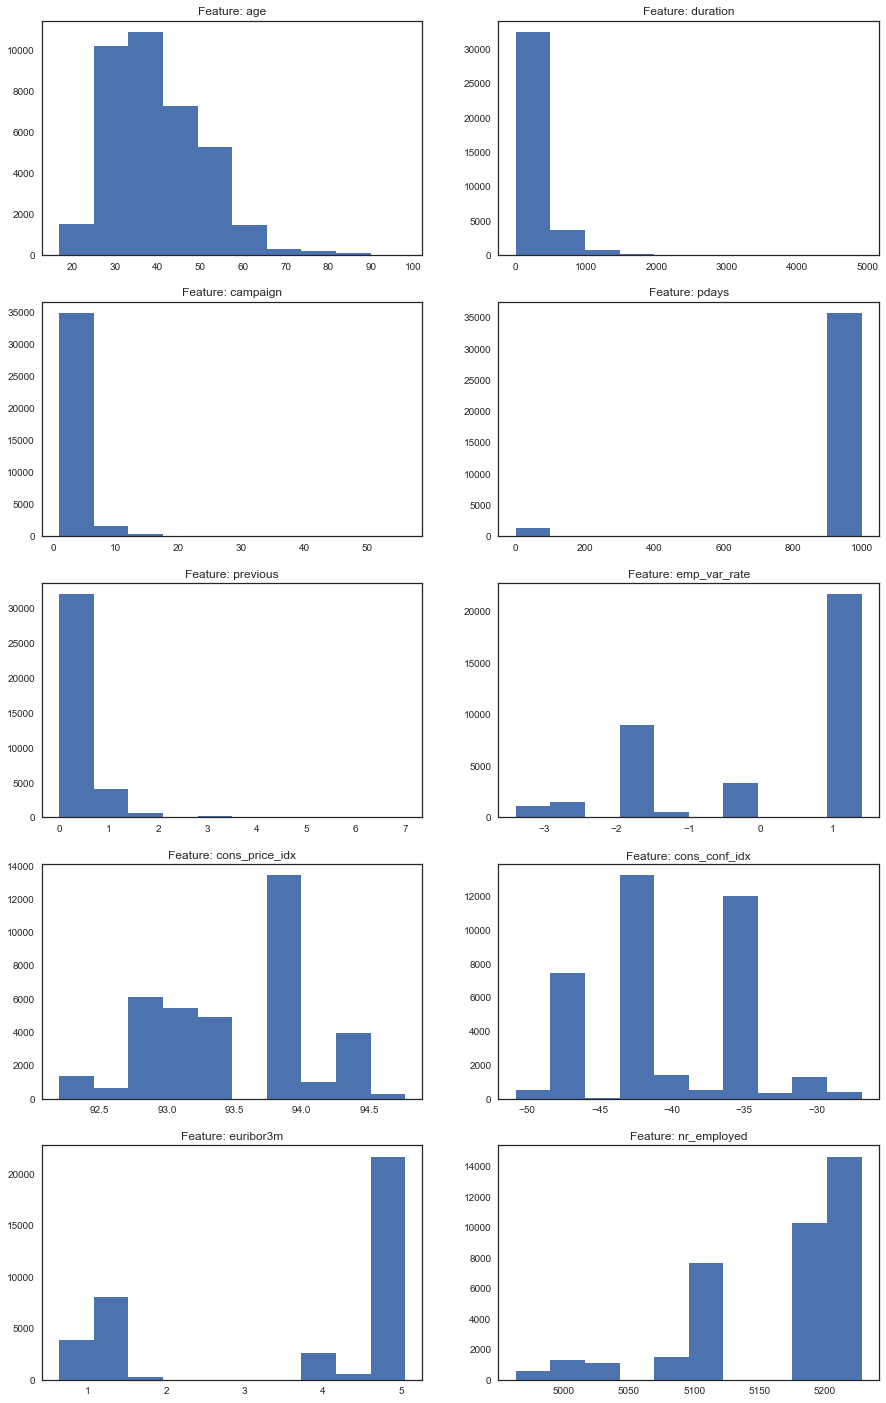

In [129]:
# Define numerical features
num_feats = df.select_dtypes(include = np.number).columns

# Create barplot of numerical features

fig, axes = plt.subplots(5,2, figsize = (15,25))

for c, col in enumerate(num_feats):
    
    ax_x = c // 2
    ax_y = c % 2
    
    axes[ax_x, ax_y].hist(df[col])    
    axes[ax_x, ax_y].set_title(f'Feature: {col}')
    axes[ax_x, ax_y].set_xlabel(None) 


plt.show()

Let us visualize **categorical** attributes using barplots. We will distinguish between `yes` or `no` values of our target variable to get an initial idea of which attributes might have the biggest impact on whether a customer will subscribe to a term deposit.

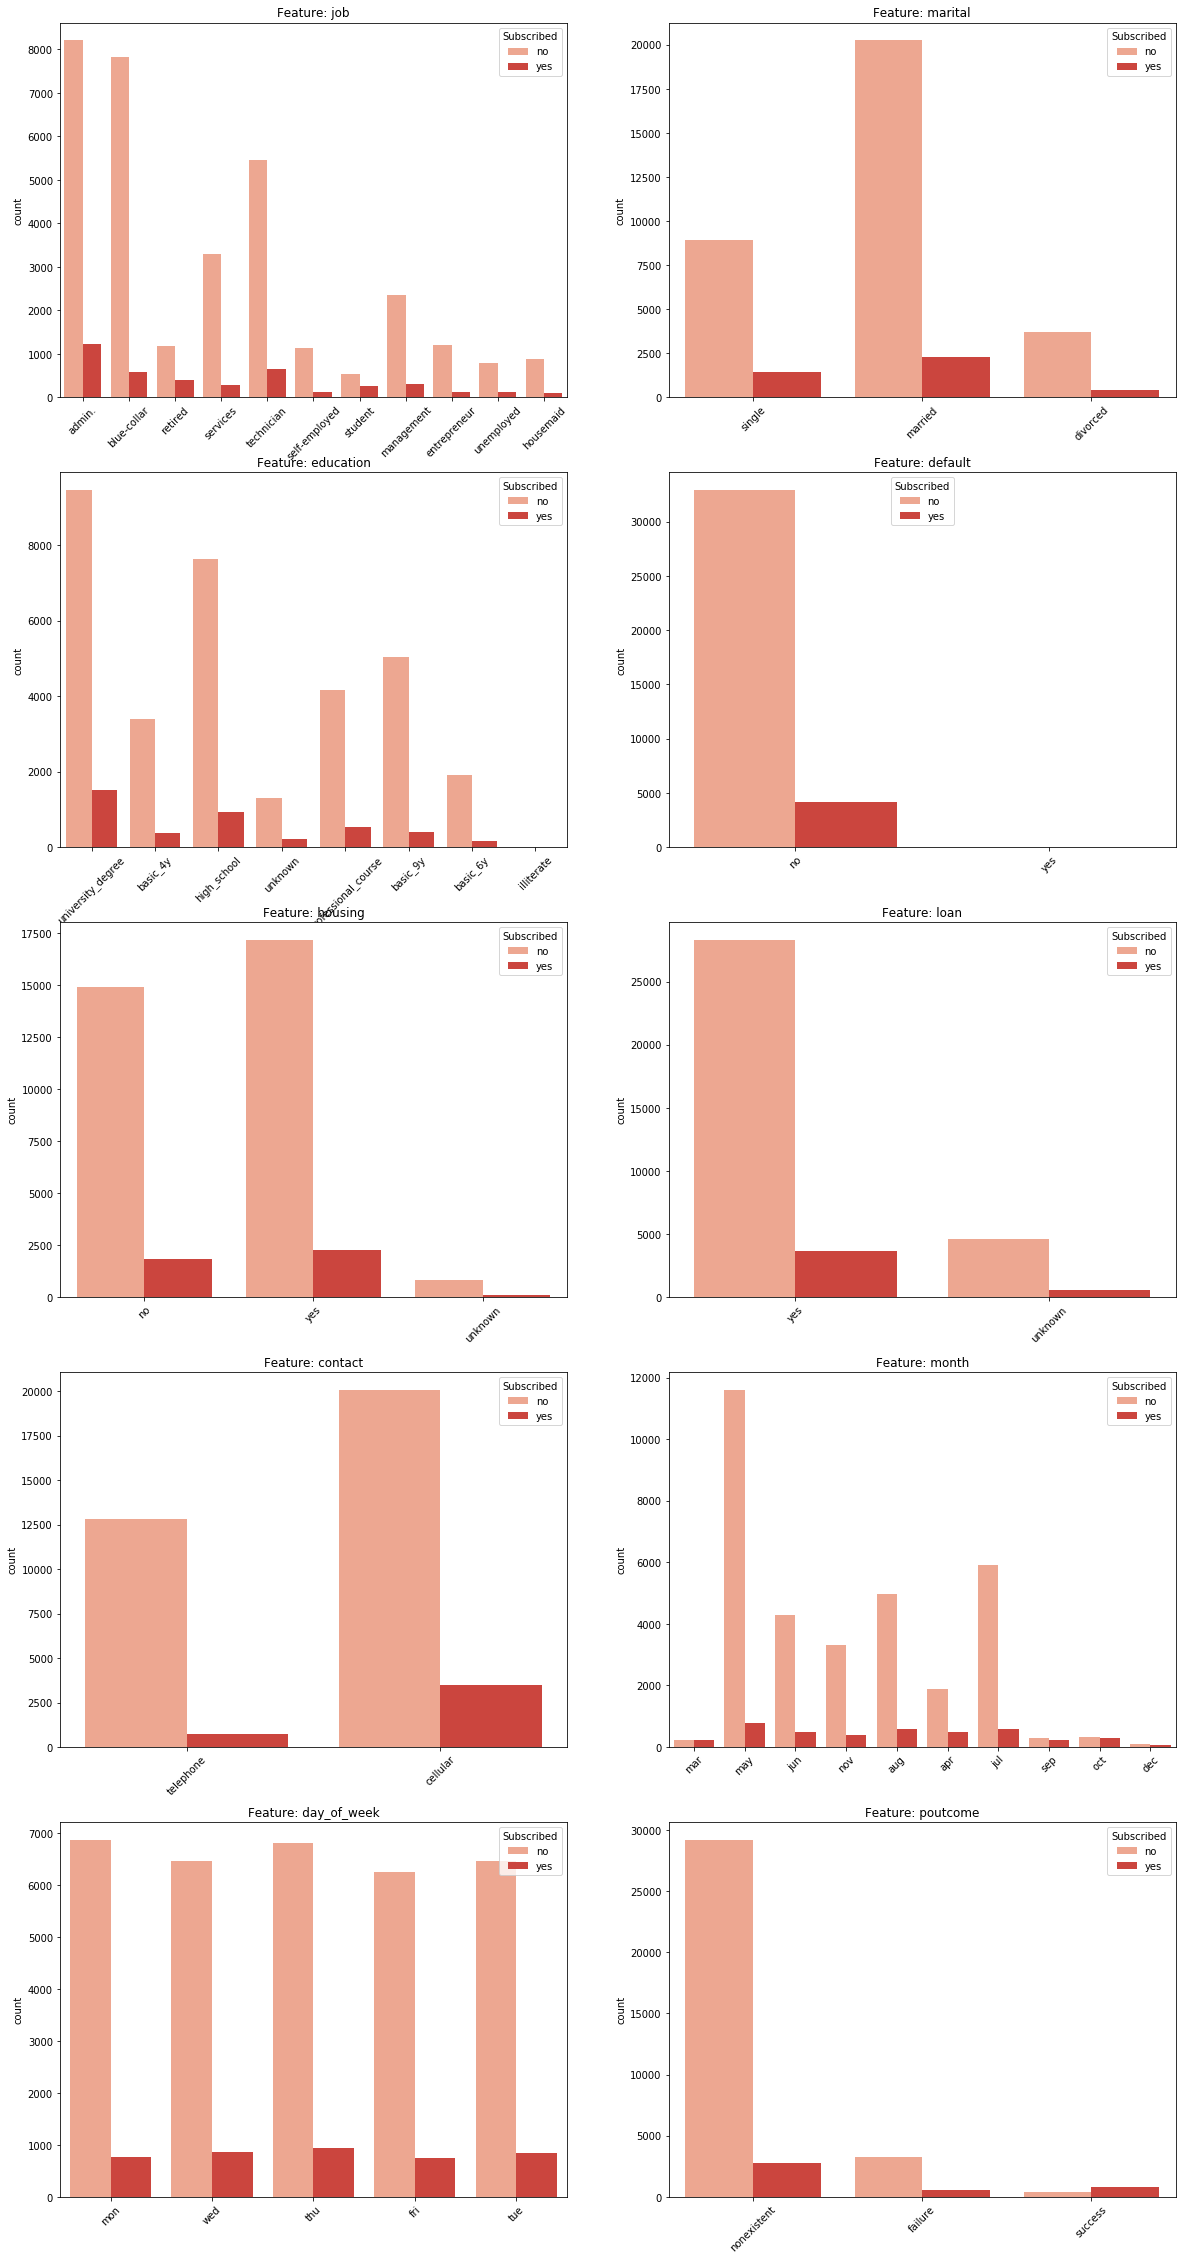

In [102]:
# Define cat feats as catcols less last item y
cat_feats = list(catcols)[:-1]

# Create barplot of categorical features with hue target variable

fig, axes = plt.subplots(5,2, figsize = (20,40))

for c, col in enumerate(cat_feats):
    ax_x = c // 2
    ax_y = c % 2
    sns.countplot(df[col], hue = df['y'], palette = 'Reds', ax = axes[ax_x, ax_y])
    
    axes[ax_x, ax_y].set_title(f'Feature: {col}')
    axes[ax_x, ax_y].set_xlabel(None) 
    axes[ax_x, ax_y].legend(title = "Subscribed") 
    # Adjust ticks to 45
    for tick in axes[ax_x, ax_y].get_xticklabels():
        tick.set_rotation(45)
plt.show()